# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [159]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames



# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [160]:
# The total number of records
data.shape[0]

45222

In [161]:
# The number of individuals making more than $50000 annually
data[data['income'] == '>50K'].shape[0]

11208

In [162]:
# The number of individuals making at most $50000 annually
data[data['income'] == '<=50K'].shape[0]

34014

In [163]:
# The percentage of individuals making at more than $50000 annually
data[data['income'] == '>50K'].shape[0] / data.shape[0] * 100

24.78439697492371

### Exercise 2 Preprocessing 

C:\Users\86178\AppData\Local\Temp\ipykernel_18056\3667833147.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], kde=False, rug=True,ax = axes[0])
C:\Users\86178\AppData\Local\Temp\ipykernel_18056\3667833147.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['education-num'],

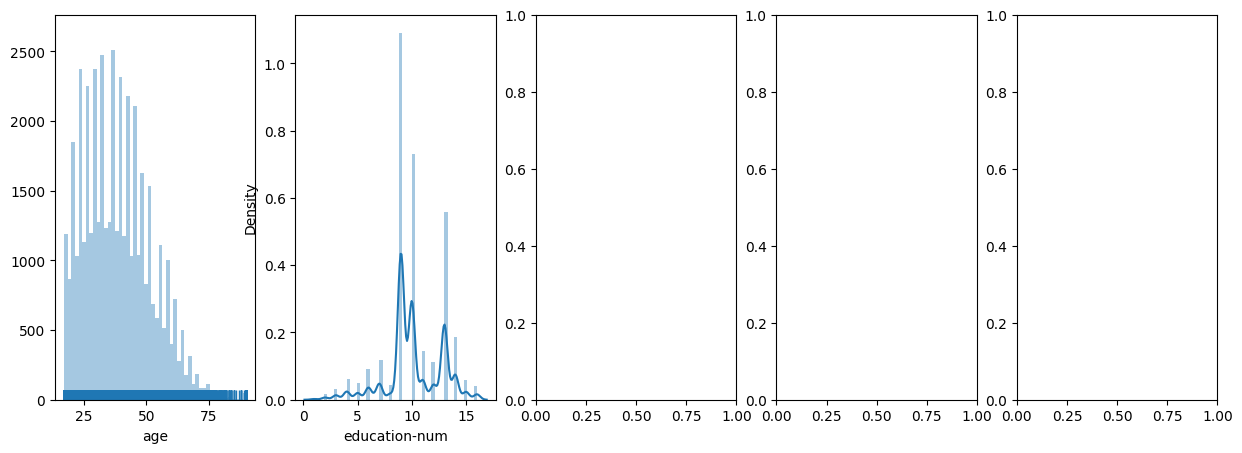

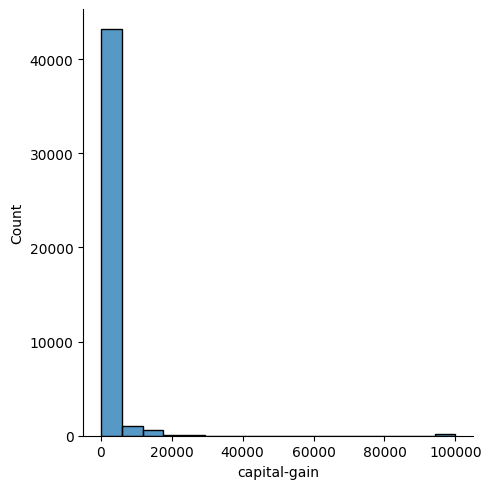

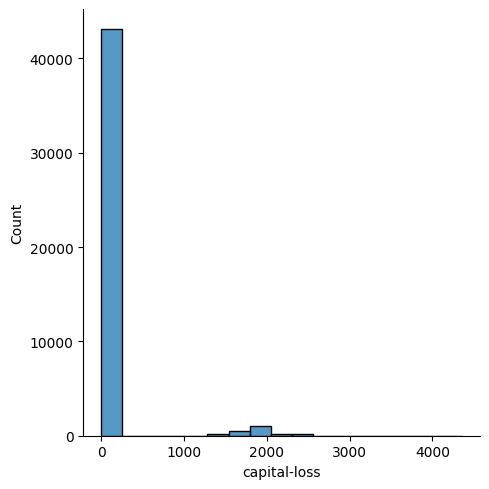

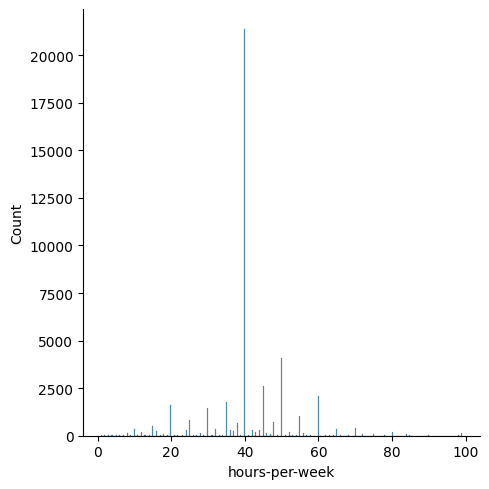

In [164]:
# Visualize skewed continuous features of original data
import seaborn as sns
import matplotlib.pyplot as plt

# skewed means not normally distributed
# kurtosis is the measure of how outlier-prone a distribution is

fig, axes = plt.subplots(1,5,figsize=(15,5))
sns.distplot(data['age'], kde=False, rug=True,ax = axes[0])
sns.distplot(data['education-num'], ax = axes[1])
sns.displot(data['capital-gain'],ax = axes[2])
sns.displot(data['capital-loss'],ax = axes[3])
sns.displot(data['hours-per-week'], ax = axes[4])
# kde = False means no kernel density estimation
# rug = True means draw a small vertical tick at each observation
# hist() function is used to plot a histogram

In [165]:
import numpy as np
import scipy.stats as stats
def grubbs_test(x):
    n = len(x)
    mean_x = np.mean(x)
    sd_x = np.std(x)
    numerator = max(abs(x-mean_x))
    g_calculated = numerator/sd_x
    print("Grubbs Calculated Value:",g_calculated)
    t_value = stats.t.ppf(1 - 0.05 / (2 * n), n - 2)
    g_critical = ((n - 1) * np.sqrt(np.square(t_value))) / (np.sqrt(n) * np.sqrt(n - 2 + np.square(t_value)))
    print("Grubbs Critical Value:",g_critical)
    if g_critical > g_calculated:
        print("从Grubbs_test中我们观察到计算值小于临界值，接受零假设，得出结论：不存在异常值")
    else:
        print("从Grubbs_test中我们观察到计算值大于临界值，拒绝零假设，得出结论：存在一个异常值")

# 输出结果：
# Grubbs Calculated Value: 1.4274928542926593
# Grubbs Critical Value: 1.887145117792422
# 从Grubbs_test中我们观察到计算值小于临界值，接受零假设，得出结论：不存在异常值

# Grubbs Calculated Value: 2.2765147221587774
#　Grubbs Critical Value: 2.019968507680656
# 从Grubbs_test中我们观察到计算值大于临界值，拒绝零假设，得出结论：存在一个异常值

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,AGE
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.034201
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0.866417
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,-0.041455
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,1.093385
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,-0.798015


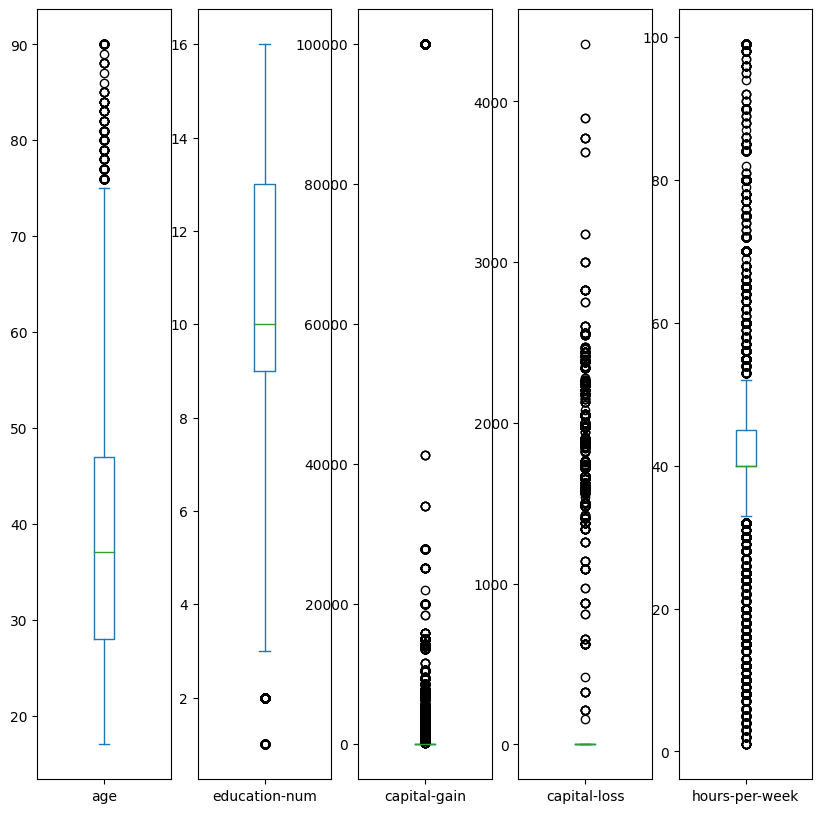

In [166]:
# Outliers Treatment
data.plot(kind='box', subplots=True,sharex=False, sharey=False, figsize=(10,10))
# sharex = False means do not share x axis
# layout = (3,3) means 3 rows and 3 columns
# box() function is used to plot a box plot

# grubbs_test(data['age']),
# grubbs_test(data['education-num']),
# grubbs_test(data['capital-gain']),
# grubbs_test(data['capital-loss']),
# grubbs_test(data['hours-per-week'])
# We use grubbs test to find out capital-gain, captial-loss has an outlier

import scipy.stats as stats
# Creating new variable with Z-score of each record:
data2 = data.copy()
data2['AGE'] = stats.zscore(data2['age'])
# zscore() function is used to calculate the z score of each value in the sample, relative to the sample mean and standard deviation.
data2.head()

In [167]:
# Combined Lower limit and Upper limit:
data2[(data2['AGE']<-3) | (data2['AGE']>3)]

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,AGE
68,79,Private,Some-college,10.0,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0.0,0.0,20.0,United-States,<=50K,3.060441
206,90,Private,HS-grad,9.0,Never-married,Other-service,Not-in-family,Black,Male,0.0,2206.0,40.0,United-States,<=50K,3.892656
845,81,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,30.0,United-States,<=50K,3.211753
956,90,Private,HS-grad,9.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K,3.892656
1075,88,Self-emp-not-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K,3.741344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,84,Private,HS-grad,9.0,Widowed,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,40.0,England,<=50K,3.438720
44921,80,Private,HS-grad,9.0,Widowed,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K,3.136097
44957,80,Self-emp-not-inc,7th-8th,4.0,Married-spouse-absent,Farming-fishing,Unmarried,White,Male,0.0,0.0,15.0,United-States,<=50K,3.136097
45054,83,Private,Some-college,10.0,Divorced,Prof-specialty,Unmarried,White,Female,0.0,0.0,20.0,United-States,<=50K,3.363065


In [168]:
# Total number of outliers:
data2[(data2['AGE']<-3) | (data2['AGE']>3)].shape[0]

163

In [169]:
# Cleaned Data: without outliers so z>-3 and z< +3
presum = data2['AGE'].shape[0]
data2 = data2[(data2['AGE']>-3) & (data2['AGE']<3)].reset_index(drop=True)
# reset_index() function is used to reset the index of the dataframe, and use the default one instead.
# 删除异常值后，index会有空缺，reset_index()函数可以重新设置index，使其从0开始
# 如果改成reset_index(drop = True)，则会删除原来的index，不会保留
data2.head(),presum,data2['AGE'].shape[0]

(   age          workclass education_level  education-num       marital-status  \
 0   39          State-gov       Bachelors           13.0        Never-married   
 1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
 2   38            Private         HS-grad            9.0             Divorced   
 3   53            Private            11th            7.0   Married-civ-spouse   
 4   28            Private       Bachelors           13.0   Married-civ-spouse   
 
            occupation    relationship    race      sex  capital-gain  \
 0        Adm-clerical   Not-in-family   White     Male        2174.0   
 1     Exec-managerial         Husband   White     Male           0.0   
 2   Handlers-cleaners   Not-in-family   White     Male           0.0   
 3   Handlers-cleaners         Husband   Black     Male           0.0   
 4      Prof-specialty            Wife   Black   Female           0.0   
 
    capital-loss  hours-per-week  native-country income       AGE 

In [170]:
data['age'].shape[0],data2['AGE'].shape[0]

(45222, 45059)

In [171]:
data2['CG'] = stats.zscore(data2['capital-gain'])
data2 = data2[(data2['CG']>-3) & (data2['CG']<3)].reset_index(drop=True)
data2.head(),data.shape[0],data2.shape[0]

(   age          workclass education_level  education-num       marital-status  \
 0   39          State-gov       Bachelors           13.0        Never-married   
 1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
 2   38            Private         HS-grad            9.0             Divorced   
 3   53            Private            11th            7.0   Married-civ-spouse   
 4   28            Private       Bachelors           13.0   Married-civ-spouse   
 
            occupation    relationship    race      sex  capital-gain  \
 0        Adm-clerical   Not-in-family   White     Male        2174.0   
 1     Exec-managerial         Husband   White     Male           0.0   
 2   Handlers-cleaners   Not-in-family   White     Male           0.0   
 3   Handlers-cleaners         Husband   Black     Male           0.0   
 4      Prof-specialty            Wife   Black   Female           0.0   
 
    capital-loss  hours-per-week  native-country income       AGE 

In [172]:
data2['CL'] = stats.zscore(data2['capital-loss'])
data2 = data2[(data2['CL']>-3) & (data2['CL']<3)].reset_index(drop=True)
data2.head(),data.shape[0],data2.shape[0]

(   age          workclass education_level  education-num       marital-status  \
 0   39          State-gov       Bachelors           13.0        Never-married   
 1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
 2   38            Private         HS-grad            9.0             Divorced   
 3   53            Private            11th            7.0   Married-civ-spouse   
 4   28            Private       Bachelors           13.0   Married-civ-spouse   
 
            occupation    relationship    race      sex  capital-gain  \
 0        Adm-clerical   Not-in-family   White     Male        2174.0   
 1     Exec-managerial         Husband   White     Male           0.0   
 2   Handlers-cleaners   Not-in-family   White     Male           0.0   
 3   Handlers-cleaners         Husband   Black     Male           0.0   
 4      Prof-specialty            Wife   Black   Female           0.0   
 
    capital-loss  hours-per-week  native-country income       AGE 

In [173]:
data2['EN'] = stats.zscore(data2['education-num'])
data2 = data2[(data2['EN']>-3) & (data2['EN']<3)].reset_index(drop=True)
data2.head(),data.shape[0],data2.shape[0]

(   age          workclass education_level  education-num       marital-status  \
 0   39          State-gov       Bachelors           13.0        Never-married   
 1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
 2   38            Private         HS-grad            9.0             Divorced   
 3   53            Private            11th            7.0   Married-civ-spouse   
 4   28            Private       Bachelors           13.0   Married-civ-spouse   
 
            occupation    relationship    race      sex  capital-gain  \
 0        Adm-clerical   Not-in-family   White     Male        2174.0   
 1     Exec-managerial         Husband   White     Male           0.0   
 2   Handlers-cleaners   Not-in-family   White     Male           0.0   
 3   Handlers-cleaners         Husband   Black     Male           0.0   
 4      Prof-specialty            Wife   Black   Female           0.0   
 
    capital-loss  hours-per-week  native-country income       AGE 

In [174]:
data2['HW'] = stats.zscore(data2['hours-per-week'])
data2 = data2[(data2['HW']>-3) & (data2['HW']<3)].reset_index(drop=True)
data2.head(),data.shape[0],data2.shape[0]

(   age          workclass education_level  education-num       marital-status  \
 0   39          State-gov       Bachelors           13.0        Never-married   
 1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
 2   38            Private         HS-grad            9.0             Divorced   
 3   53            Private            11th            7.0   Married-civ-spouse   
 4   28            Private       Bachelors           13.0   Married-civ-spouse   
 
            occupation    relationship    race      sex  capital-gain  \
 0        Adm-clerical   Not-in-family   White     Male        2174.0   
 1     Exec-managerial         Husband   White     Male           0.0   
 2   Handlers-cleaners   Not-in-family   White     Male           0.0   
 3   Handlers-cleaners         Husband   Black     Male           0.0   
 4      Prof-specialty            Wife   Black   Female           0.0   
 
    capital-loss  hours-per-week  native-country income       AGE 

In [175]:
# IQR：IQR对于非正态分布的数据或具有长尾分布的数据更具鲁棒性。它不依赖于数据的正态性假设，并且可以应用于非对称的数据分布。
# Z-Score：Z-Score假设数据近似服从正态分布。它对于正态分布数据或大样本量的数据效果较好，但在非正态分布下可能不够准确。
data3 = data2.copy()
numeral = ['age','education-num','capital-gain','capital-loss','hours-per-week']
Z_score = ['AGE','EN','CG','CL','HW']
data3[numeral].head()

,age,education-num,capital-gain,capital-loss,hours-per-week
0,39,13.0,2174.0,0.0,40.0
1,50,13.0,0.0,0.0,13.0
2,38,9.0,0.0,0.0,40.0
3,53,7.0,0.0,0.0,40.0
4,28,13.0,0.0,0.0,40.0


In [176]:
from sklearn.preprocessing import StandardScaler
data3[Z_score] = StandardScaler().fit_transform(data3[numeral])
data3[Z_score].head(),data3[numeral].head()

(        AGE        EN        CG        CL        HW
 0  0.070190  1.186627  0.687069 -0.035829 -0.038267
 1  0.920766  1.186627 -0.246202 -0.035829 -2.564129
 2 -0.007135 -0.456353 -0.246202 -0.035829 -0.038267
 3  1.152742 -1.277843 -0.246202 -0.035829 -0.038267
 4 -0.780386  1.186627 -0.246202 -0.035829 -0.038267,
    age  education-num  capital-gain  capital-loss  hours-per-week
 0   39           13.0        2174.0           0.0            40.0
 1   50           13.0           0.0           0.0            13.0
 2   38            9.0           0.0           0.0            40.0
 3   53            7.0           0.0           0.0            40.0
 4   28           13.0           0.0           0.0            40.0)

C:\Users\86178\AppData\Local\Temp\ipykernel_18056\2822901164.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['age'], ax=axes[0,0])
C:\Users\86178\AppData\Local\Temp\ipykernel_18056\2822901164.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['AGE'], ax=axes[0,1])
C:\Users\86178

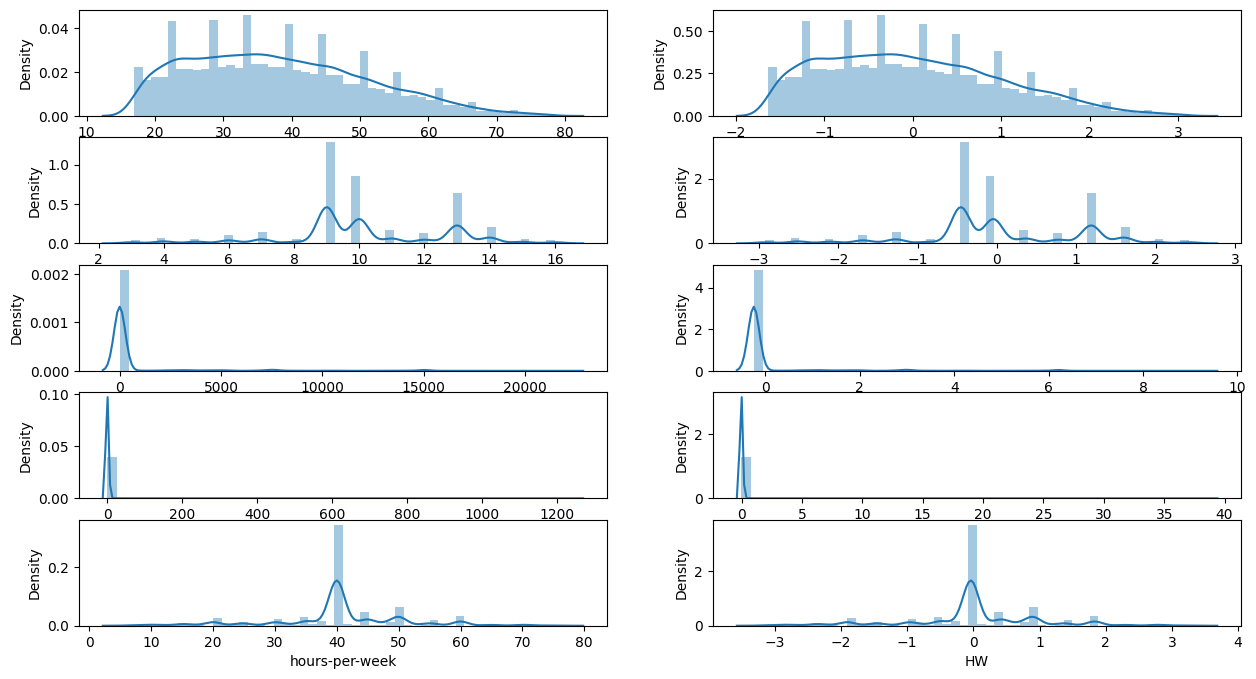

In [177]:
fig, axes = plt.subplots(5,2, figsize=(15,8))

sns.distplot(data3['age'], ax=axes[0,0])
sns.distplot(data3['AGE'], ax=axes[0,1])
sns.distplot(data3['education-num'], ax=axes[1,0])
sns.distplot(data3['EN'], ax=axes[1,1])
sns.distplot(data3['capital-gain'], ax=axes[2,0])
sns.distplot(data3['CG'], ax=axes[2,1])
sns.distplot(data3['capital-loss'], ax=axes[3,0])
sns.distplot(data3['CL'], ax=axes[3,1])
sns.distplot(data3['hours-per-week'], ax=axes[4,0])
sns.distplot(data3['HW'], ax=axes[4,1])


plt.show()

In [272]:
# Data Transformation
# Perform one-hot encoding on the data
df_loans = data3[numeral+['sex','income']].copy()
df_loans[numeral] = StandardScaler().fit_transform(df_loans[numeral])
df_loans.head(),df_loans.shape,df_loans.dtypes

(        age  education-num  capital-gain  capital-loss  hours-per-week  \
 0  0.070190       1.186627      0.687069     -0.035829       -0.038267   
 1  0.920766       1.186627     -0.246202     -0.035829       -2.564129   
 2 -0.007135      -0.456353     -0.246202     -0.035829       -0.038267   
 3  1.152742      -1.277843     -0.246202     -0.035829       -0.038267   
 4 -0.780386       1.186627     -0.246202     -0.035829       -0.038267   
 
        sex income  
 0     Male  <=50K  
 1     Male  <=50K  
 2     Male  <=50K  
 3     Male  <=50K  
 4   Female  <=50K  ,
 (41779, 7),
 age               float64
 education-num     float64
 capital-gain      float64
 capital-loss      float64
 hours-per-week    float64
 sex                object
 income             object
 dtype: object)

In [273]:
#df_loans = pd.get_dummies(df_loans, columns=['index','race','occupation','native-country','relationship','marital-status','education_level','workclass','level_0'],drop_first=True)
# get_dummies() function is used to convert categorical variable into dummy/indicator variables.
df_loans.head(),df_loans.shape,df_loans.dtypes

(        age  education-num  capital-gain  capital-loss  hours-per-week  \
 0  0.070190       1.186627      0.687069     -0.035829       -0.038267   
 1  0.920766       1.186627     -0.246202     -0.035829       -2.564129   
 2 -0.007135      -0.456353     -0.246202     -0.035829       -0.038267   
 3  1.152742      -1.277843     -0.246202     -0.035829       -0.038267   
 4 -0.780386       1.186627     -0.246202     -0.035829       -0.038267   
 
        sex income  
 0     Male  <=50K  
 1     Male  <=50K  
 2     Male  <=50K  
 3     Male  <=50K  
 4   Female  <=50K  ,
 (41779, 7),
 age               float64
 education-num     float64
 capital-gain      float64
 capital-loss      float64
 hours-per-week    float64
 sex                object
 income             object
 dtype: object)

,age,education-num,capital-gain,capital-loss,hours-per-week,sex,income
0,0.070190,1.186627,0.687069,-0.035829,-0.038267,1,0
1,0.920766,1.186627,-0.246202,-0.035829,-2.564129,1,0
2,-0.007135,-0.456353,-0.246202,-0.035829,-0.038267,1,0
3,1.152742,-1.277843,-0.246202,-0.035829,-0.038267,1,0
4,-0.780386,1.186627,-0.246202,-0.035829,-0.038267,0,0


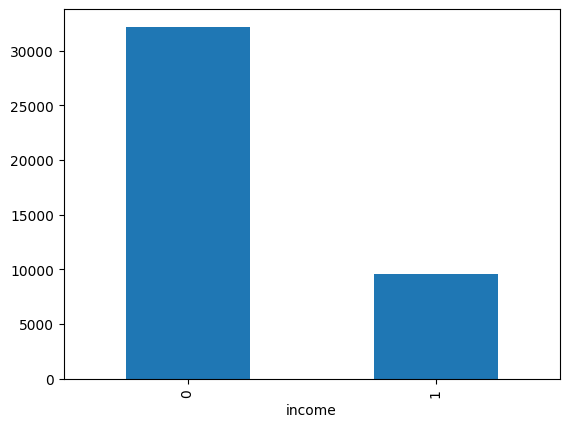

In [274]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding
df_loans['sex'] = LabelEncoder().fit_transform(df_loans['sex'])
df_loans['income'] = LabelEncoder().fit_transform(df_loans['income'])
df_loans['income'].value_counts().plot(kind='bar')
df_loans.head()

In [275]:
df_loans.dtypes

age               float64
education-num     float64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
sex                 int32
income              int32
dtype: object

### Exercise 3 Shuffle and Split Data

In [276]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
Y = df_loans['income']
X = df_loans.drop('income',axis=1)
X.head(),Y.head()

(        age  education-num  capital-gain  capital-loss  hours-per-week  sex
 0  0.070190       1.186627      0.687069     -0.035829       -0.038267    1
 1  0.920766       1.186627     -0.246202     -0.035829       -2.564129    1
 2 -0.007135      -0.456353     -0.246202     -0.035829       -0.038267    1
 3  1.152742      -1.277843     -0.246202     -0.035829       -0.038267    1
 4 -0.780386       1.186627     -0.246202     -0.035829       -0.038267    0,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: income, dtype: int32)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state =0)
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (33423, 6)
The shape of X_test is: (8356, 6)

The shape of y_train is: (33423,)
The shape of y_test is: (8356,)


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [278]:
# Evaluating Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC 
from sklearn import metrics

In [279]:
model = DecisionTreeClassifier()

model.fit(X_train,y_train) 

y_prediction = model.predict(X_test) 

print('Decision Tree accuracy = ', metrics.accuracy_score(y_prediction,y_test))

Decision Tree accuracy =  0.8255146002872188


In [280]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict_proba(X_test)#Return probability estimates for the test vector X.
threshold = 0.8
y_pred_class = y_pred[:, 1]   > threshold
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
accuracy = (tp + tn) / (tp + fp + fn + tn) 
# ravel() means rank 1 array, is used to convert the matrix into a single row

# Or simply
accuracy_score(y_test, y_pred_class)

0.8214456677836285

### Exercise 4 Questions
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

In [281]:
# What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000
accuracy = (df_loans['income'] == 1).mean()
f_score = 2 * accuracy / (1 + accuracy)
accuracy, f_score

(0.2299001890902128, 0.3738517826560797)

### Exercise 5 Evaluating Model 

In [282]:
# Now if we assume a model that predicts any individual's income more than \$50,000
#then what would be that model's accuracy and F-score on this dataset? You can use the code provided in the previous section.
accuracy = (df_loans['income'] == 0).mean()
f_score = 2 * accuracy / (1 + accuracy)
accuracy, f_score


(0.7700998109097872, 0.8701202114856733)

In [283]:
#- Gaussian Naive Bayes (GaussianNB)
GaussianNB().fit(X_train,y_train).score(X_test,y_test)

0.8147438966012446

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [285]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Bagging
bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)

# # AdaBoost
# adaboost_model = AdaBoostClassifier()
# adaboost_model.fit(X_train, y_train)

# # Random Forest
# rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)

# # K-Nearest Neighbors
# knn_model = KNeighborsClassifier()
# knn_model.fit(X_train, y_train)

# # Support Vector Machines
# svm_model = SVC()
# svm_model.fit(X_train, y_train)

# # Logistic Regression
# lr_model = LogisticRegression()
# lr_model.fit(X_train, y_train)

BaggingClassifier()

In [286]:
# Decision Tree
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# Bagging
bagging_pred = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred)
bagging_recall = recall_score(y_test, bagging_pred)
bagging_f1 = f1_score(y_test, bagging_pred)

# # AdaBoost
# adaboost_pred = adaboost_model.predict(X_test)
# adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
# adaboost_precision = precision_score(y_test, adaboost_pred)
# adaboost_recall = recall_score(y_test, adaboost_pred)
# adaboost_f1 = f1_score(y_test, adaboost_pred)

# # Random Forest
# rf_pred = rf_model.predict(X_test)
# rf_accuracy = accuracy_score(y_test, rf_pred)
# rf_precision = precision_score(y_test, rf_pred)
# rf_recall = recall_score(y_test, rf_pred)
# rf_f1 = f1_score(y_test, rf_pred)

# # K-Nearest Neighbors
# knn_pred = knn_model.predict(X_test)
# knn_accuracy = accuracy_score(y_test, knn_pred)
# knn_precision = precision_score(y_test, knn_pred)
# knn_recall = recall_score(y_test, knn_pred)
# knn_f1 = f1_score(y_test, knn_pred)

# # Support Vector Machines
# svm_pred = svm_model.predict(X_test)
# svm_accuracy = accuracy_score(y_test, svm_pred)
# svm_precision = precision_score(y_test, svm_pred)
# svm_recall = recall_score(y_test, svm_pred)
# svm_f1 = f1_score(y_test, svm_pred)

# # Logistic Regression
# lr_pred = lr_model.predict(X_test)
# lr_accuracy = accuracy_score(y_test, lr_pred)
# lr_precision = precision_score(y_test, lr_pred)
# lr_recall = recall_score(y_test, lr_pred)
# lr_f1 = f1_score(y_test, lr_pred)

In [287]:
dt_accuracy, bagging_accuracy,dt_f1, bagging_f1

(0.8261129727142174, 0.824557204404021, 0.5519580635214307, 0.5562953995157385)

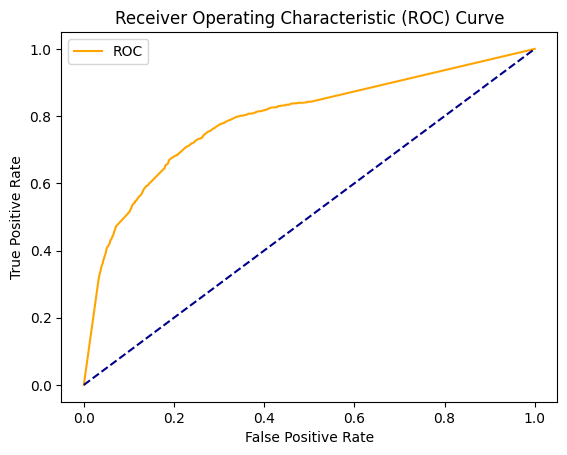

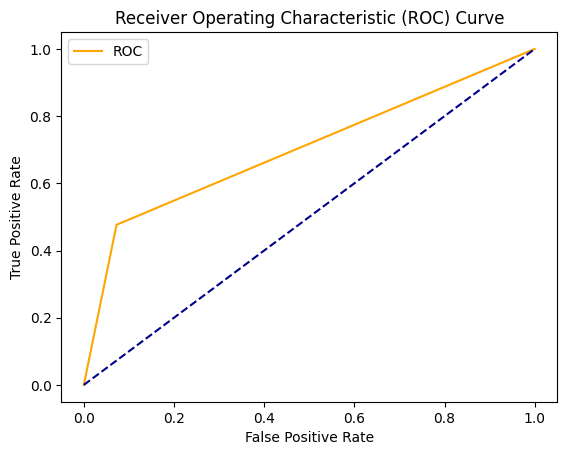

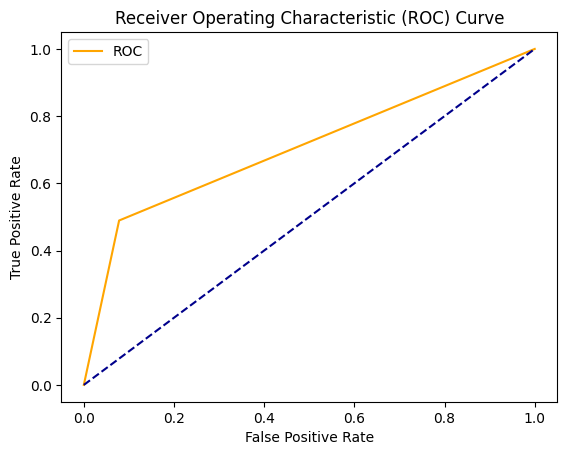

In [290]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#fig, axes = plt.subplots(1,3, figsize=(15,8))

y_pred = model.predict_proba(X_test)
fper, tper, thresholds = metrics.roc_curve(y_test,y_pred[:,1])

# 计算 AUC（Area Under the Curve）即 ROC 曲线下的面积
# auc = roc_auc_score(y_true, y_pred_probs)

plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

dt_pred = dt_pred.reshape(-1, 1) 
# 拓展维度
dt_pred = np.hstack([1 - dt_pred, dt_pred])  
# 拼接成两列,第一列为1减去原数值
fper, tper, thresholds = metrics.roc_curve(y_test,dt_pred[:,1])
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

bagging_pred = bagging_pred.reshape(-1, 1)
bagging_pred = np.hstack([1 - bagging_pred, bagging_pred])
fper, tper, thresholds = metrics.roc_curve(y_test,bagging_pred[:,1])
plt.plot(fper, tper, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Question:
### Q1:

In [291]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Instantiate the classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Train the models
random_forest.fit(X_train, y_train)  # Replace X_train and y_train with your data
gradient_boosting.fit(X_train, y_train)
# Get feature importance scores
random_forest_importance = random_forest.feature_importances_
gradient_boosting_importance = gradient_boosting.feature_importances_

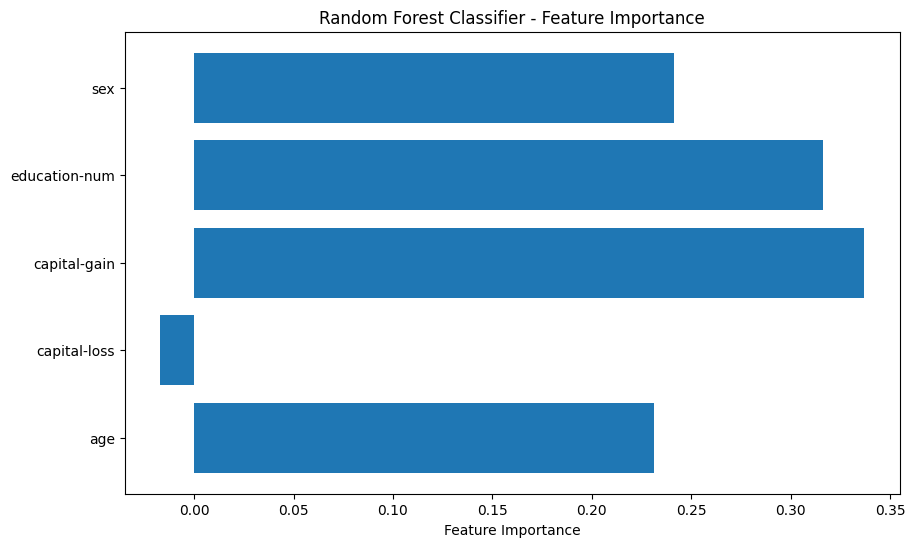

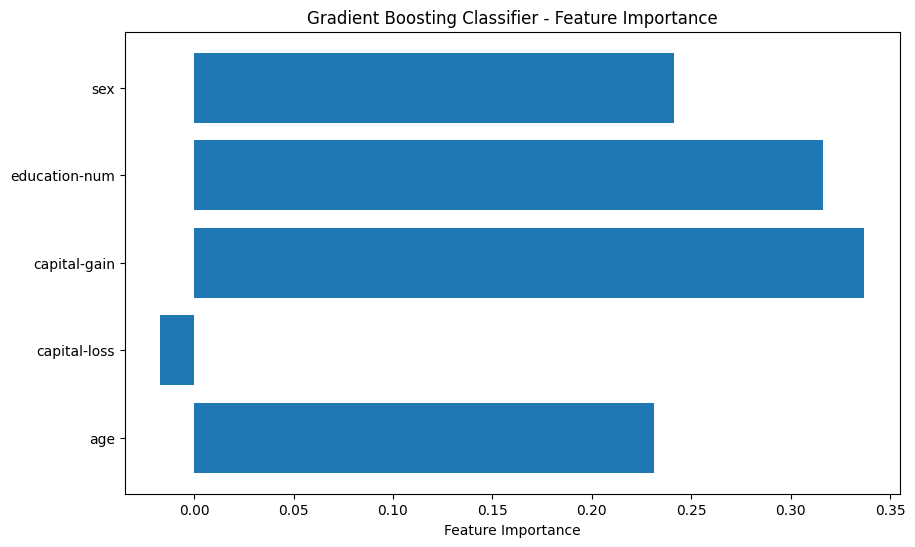

In [293]:
import matplotlib.pyplot as plt
import numpy as np

# Define the feature names
feature_names = ['sex', 'education-num', 'capital-gain', 'capital-loss','age'] 

# Create a bar graph for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_names,df_loans[numeral].corrwith(df_loans['income'])) 
plt.xlabel('Feature Importance')
plt.title('Random Forest Classifier - Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Create a bar graph for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.barh(feature_names, df_loans[numeral].corrwith(df_loans['income']))
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Classifier - Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

#### (2) Describe one real-world application in industry where a model can be applied
This credit risk modeling can be applied to forbid the discrimination. Also it can be used to evaluate the employment relevants ratios. This can be also used by sociology research to foreshadow how much a man can earn based on his known characteristics.

#### (3) What are the strengths of the model; when does it perform well?
Performs well with tabular/structured data like customer attributes
Can capture non-linear relationships between features and target
Ensemble approach avoids overfitting and improves generalization

#### (4) What are the weaknesses of the model; when does it perform poorly?
Prone to overfitting with noisy/sparse data
Loses interpretability compared to simpler models
Can be slow to train and tune with large datasets

#### (5) What makes this model a good candidate for the problem, given what you know about the data?
The census data has structured features like age, education, marital status etc which are predictive of income.
There are non-linear relationships between demographics and income which the model can capture.
The model naturally handles mixed data types like categorical and numerical features.
Ensemble approach helps avoid overfitting the training data.
Feature importance gives insights into important attributes.